필수적으로 따라가야 하는 하나의 가이드라인이라고 생각하고 임해보기

In [1]:
# 사용할 데이터셋 다운로드 하기
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") # 디렉토리 설정하기 - /기본 경로/datasets/housing
HOUSING_URL  = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # 다운로드 할 파일의 URL

def fetch_housing_data(housing_url= HOUSING_URL, housing_path= HOUSING_PATH):
  os.makedirs(housing_path, exist_ok= True) # 디렉토리 만들기
  tgz_path = os.path.join(housing_path, "housing.tgz") # 파일의 경로
  urllib.request.urlretrieve(housing_url, tgz_path) # URL로 지정한 파일을 다운로드
  housing_tgz = tarfile.open(tgz_path) # 다운 받은 파일 열기
  housing_tgz.extractall(path= housing_path) # 압축 파일(housing.tgz) 압축 풀기
  housing_tgz.close() # 파일 닫기

fetch_housing_data()

In [2]:
# 다운 받은 데이터셋(csv) 파일을 pandas 데이터 프레임으로 만들기
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH, filename="housing.csv"):
  csv_path = os.path.join(housing_path, filename) # os.path.join("/datasets/housing", "housing.csv") -> /datasets/housing/housing.csv
  return pd.read_csv(csv_path) # 데이터 프레임 리턴

# 데이터 세트 확인

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


** 가장 중요한 것: '데이터를 정확하게 파악해 어떠한 문제를 해결하기 위해 어떻게 데이터를 다룰 것인가'가 중요**

- 정형 데이터라면, 머신러닝
- 비정형 데이터라면, 딥러닝

딥러닝이 성능이 좋다고 하더라도, 각 데이터 별로 어울리는 방법을 적용하는 것이 좋다

이 경우, 정형 데이터이므로 머신러닝 적용


# 데이터의 기본 정보 확인

## housing 데이터 알아보기
각 컬럼의 의미를 살펴보기

* longitude : 경도
* latitude : 위도
* housing_median_age : 중간 주택 연도
* total_rooms : 방의 총 개수
* total_bedrooms : 침실의 총 개수
* population : 인구
* households : 가구
* median_income : 중간 소득
* median_house_value : 중간 주택 가격
* ocean_proximity : 바다와의 거리

In [4]:
# 까보면 기대했던 데이터 타입이 아닌 다른 데이터 타입일 수 있음
# : 데이터 타입을 확인하고 시작

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# 결측치 확인

# 물론 info로도 결측치를 확인할 수 있지만, 좀 더 구체적으로 보려면

housing.isnull().sum()

# 머신러닝은 절대 결측치가 들어갈 수 없음: 즉 결측치를 제거한 후 넣어야 함

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 데이터프레임의 통계적 특징 확인
- `describe()` 메소드를 이용해 통계적 특징 확인

In [6]:
housing.describe()

# 이를 통해 알 수 있는 부분

# 평균(mean)과 중위값(50%)의 차이를 통해 어떤 분포를 지니는지 파악

# + 소수점 값이 .000000으로 잘 나누어 떨어져있다면 '아, 데이터를 어느부분에서 딱 잘랐구나'라고 예측도 해볼 수 있음

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 데이터의 형태를 빠르게 검토

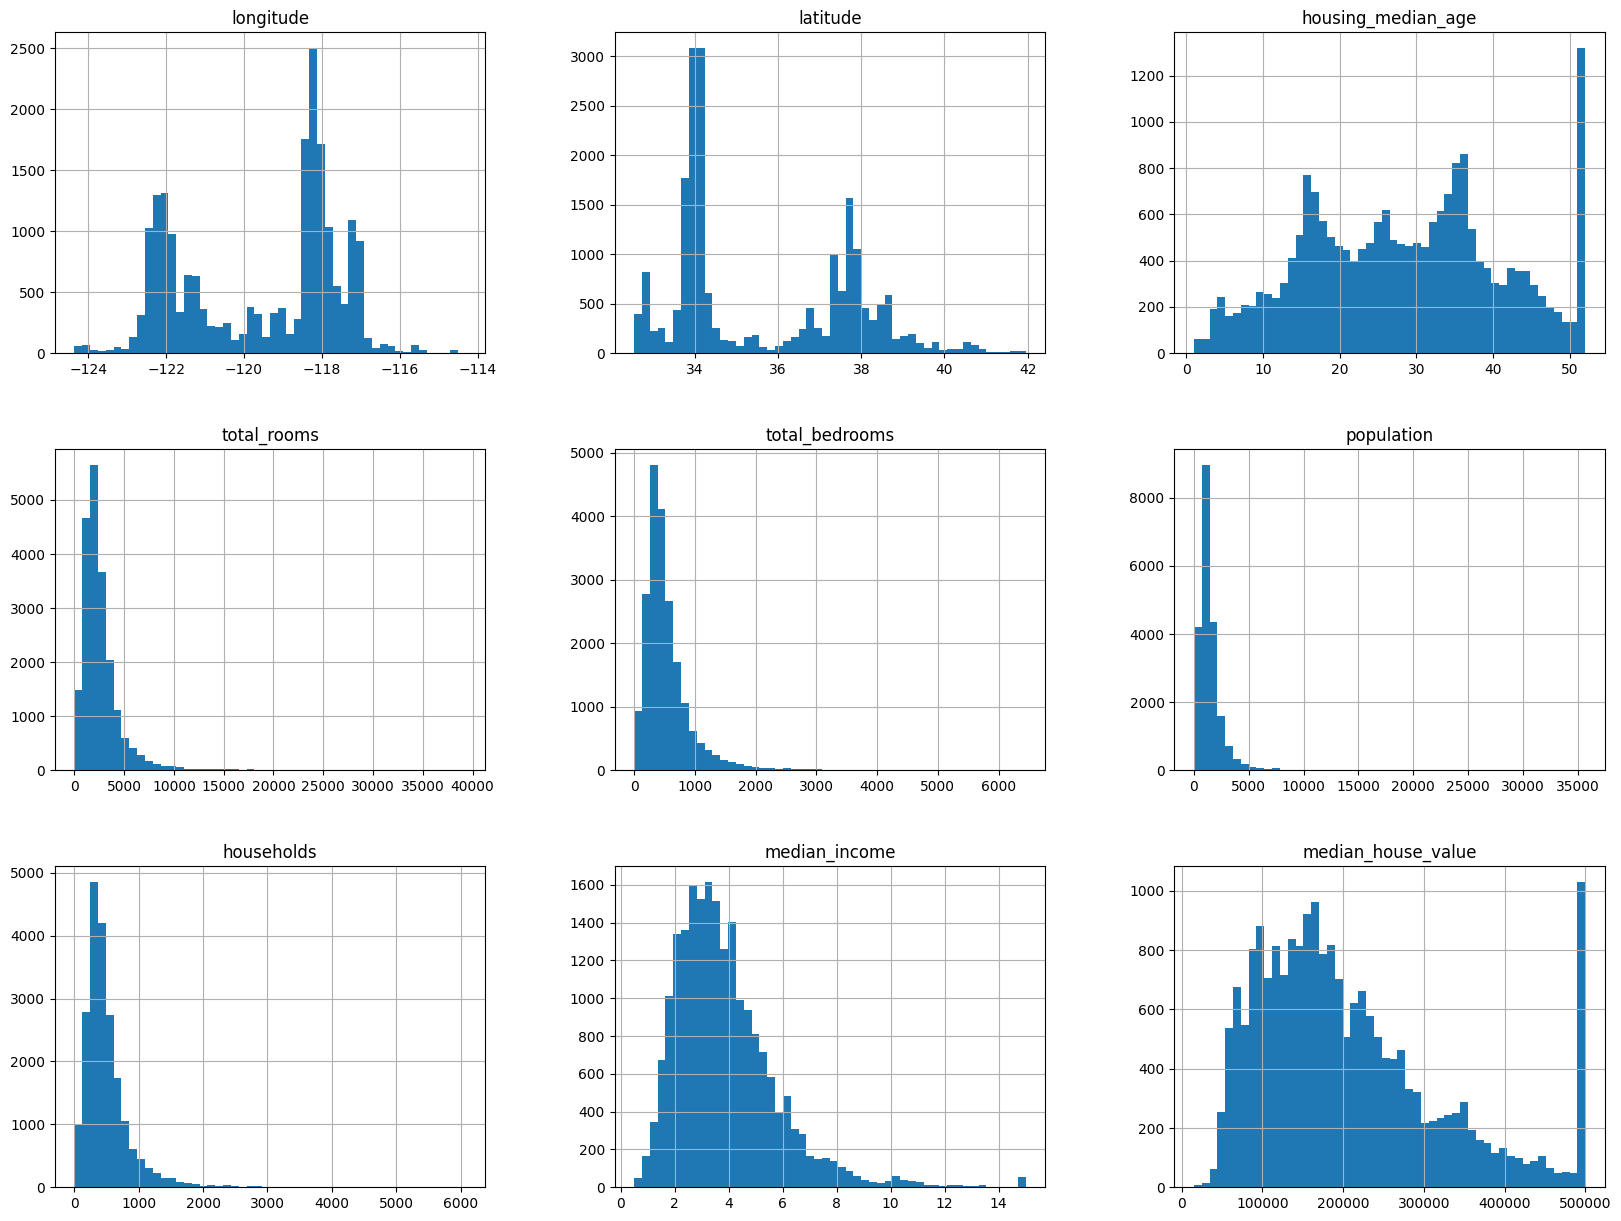

In [7]:
import matplotlib.pyplot as plt

housing.hist(
    bins=50, figsize=(20,15)
    )

plt.show()

# 이로써 특성공학에서 배운 것 중 어떤 것을 어떤 데이터에 취하면 좋겠구나라고 판단 가능
# ex. 아 'total_rooms'에 log를 취해야겠다

# 테스트 세트 만들기




In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42
    )

In [9]:
# 비즈니스 관점에서 봤을 때 시각화 자료를 보면
# ex. median_house_hold(y값)에 직접적인 영향을 미치는 것은? median_income(X값)

# 하지만 train과 test에 어떤 값이 얼마만큼 들어가는지에 따라 도출할 수 있는 y는 불리할 수 있음

# 그럼 각 계층에 맞게 잘라서(분할) 데이터를 넣어보면 어떨까? = 특성공학 기법 사용

<Axes: >

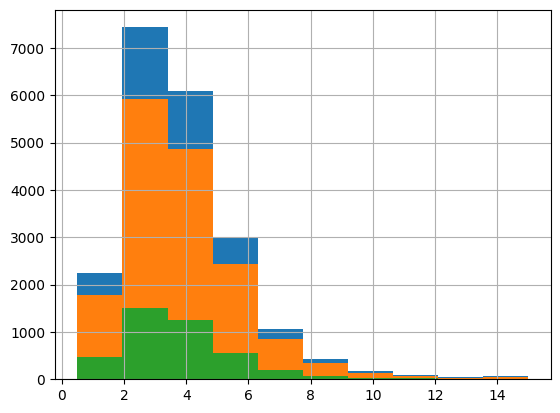

In [10]:
housing['median_income'].hist()
train_set['median_income'].hist()
test_set['median_income'].hist()


# 랜덤하게 분할 시 median_income에 대한 분할이 계층적으로 이뤄지지 않았다는 것을 확인할 수 있음

In [11]:
import numpy as np


# income_cat : 소득 구간
#   cat = categorical의 약자

housing['income_cat'] = pd.cut(
    housing['median_income'], # 구간 분할 대상 데이터
    bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
    )

# 레이블 부여

housing[['median_income','income_cat']].head()


# 구간 자체도 공평하게 나눠어져야 한다

# 히스토그램과 describe를 보면 아까 median_income 히스토그램에서 min에서 75% 구간까지 가장 많은 데이터가 분포하는 것을 확인했음
# 8까지 하면 안되냐? 되긴 하는데 그 구간의 데이터가 너무 적어서 편의상 포함 x

# 위에서 나눈 구간  bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf]에 따라 min에서 75%구간의 데이터들을 집어 넣자

,median_income,income_cat
0,8.3252,5
1,8.3014,5
2,7.2574,5
3,5.6431,4
4,3.8462,3


<Axes: >

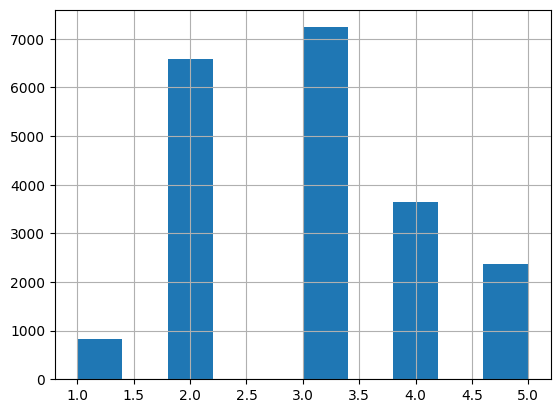

In [12]:
# 카테고리 별 히스토그램 살펴보기

housing['income_cat'].hist()

# 이를 통해 어느정도 공평하게 잘라졌다는 것을 확인할 수 있음

# 공평하게의 의미 = 비율에 맞게!(ex.남자가 60명 여자가 40명인 경우 10명을 뽑을 때, 6:4 비율로 뽑는 것)

<Axes: >

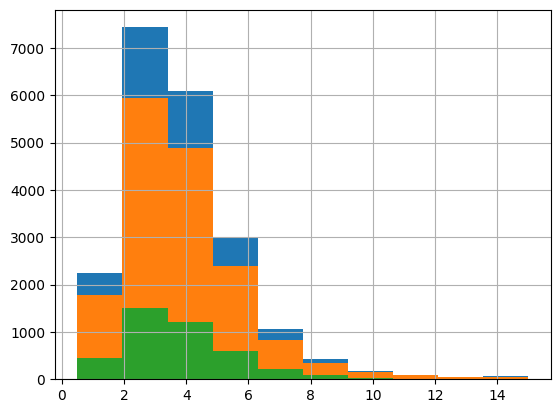

In [13]:
# 방금 위에서 살펴본 각 구간 별 분포를 반영(stratify=housing['income_cat'])해 데이터 나눠 넣기

train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify=housing['income_cat']
    )

housing['median_income'].hist()
train_set['median_income'].hist()
test_set['median_income'].hist()

# 시각화 자료로는 전과 아무런 차이가 없어보이나 무작위 샘플링 오류율	계층 샘플링 오류율을 계산하면 차이가 남

# # 랜덤하게 잘랐을 때와, 계층 분할을 이용 했을 때의 차이
# def income_cat_proportions(data):
#     return data["income_cat"].value_counts() / len(data)

# # 1. 랜덤 분할
# train_set, test_set = train_test_split(
#     housing,
#     test_size=0.2,
#     random_state=42
# )

# # 2. 계층 분할
# train_set_strat, test_set_strat = train_test_split(
#     housing,
#     test_size=0.2,
#     random_state=42,
#     stratify=housing['income_cat']
# )

# compare_props = pd.DataFrame({
#     "전체": income_cat_proportions(housing),
#     "계층 샘플링": income_cat_proportions(test_set_strat),
#     "무작위 샘플링": income_cat_proportions(test_set),
# }).sort_index()

# compare_props["무작위 샘플링 오류율"] = 100 * compare_props["무작위 샘플링"] / compare_props["전체"] - 100
# compare_props["계층 샘플링 오류율"] = 100 * compare_props["계층 샘플링"] / compare_props["전체"] - 100
# compare_props

In [14]:
train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify=housing['income_cat']
)

# EDA

EDA는 "탐색적 데이터 분석" (Exploratory Data Analysis)의 약자로, 데이터를 이해하고 분석하는 초기 단계의 방법론입니다.

EDA의 주요 목표는 데이터를 시각적으로 탐색하고, 데이터의 주요 특성과 구조를 파악하며, 통계적 요약을 통해 데이터를 요약하는 것입니다.

EDA는 다음과 같은 다양한 방법과 도구를 사용합니다.

과정:

1. 기초 통게 요약
2. 데이터 시각화
3. 데이터 관계 탐색
4. 데이터 전처리
5. 피처 엔지니어링

In [15]:
# 여기서부터는 test 세트가 없다고 가정하고 진행할 것 (훈련 세트만 가지고 EDA를 할 것임)

housing = train_set.copy()

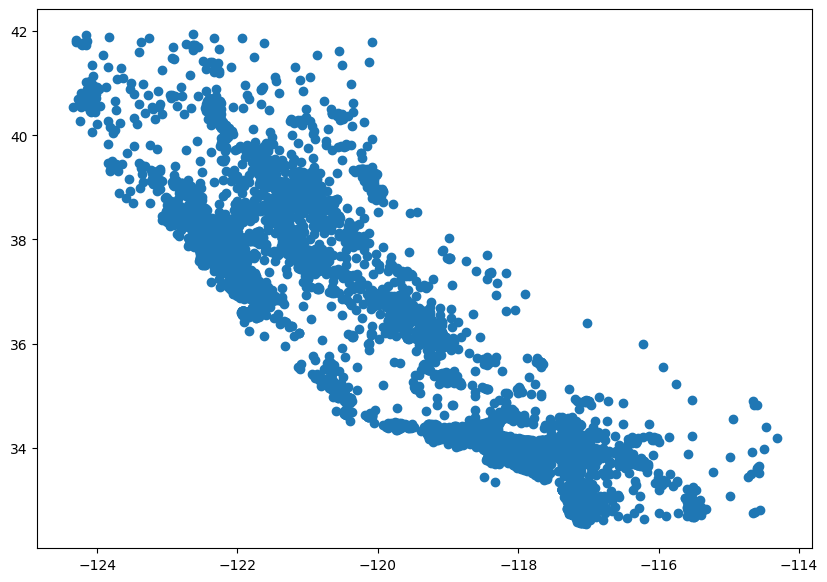

In [16]:
plt.figure(figsize=(10,7))

plt.scatter(
    x=housing['longitude'],
    y=housing['latitude'],
)

plt.show()

# 마치 지도처럼 보임(지형)

# 이를 통해 아래와 같은 가설을 세워볼 수 있음
# 집 값이 어디가 비쌀까: 집이 모여있는 데? 안 몰려 있는 데?

# 산점도 하나 하나를 투명하게 만들어 밀집 되어 있는 곳이 찐하게 나오는 곳을 알아보자

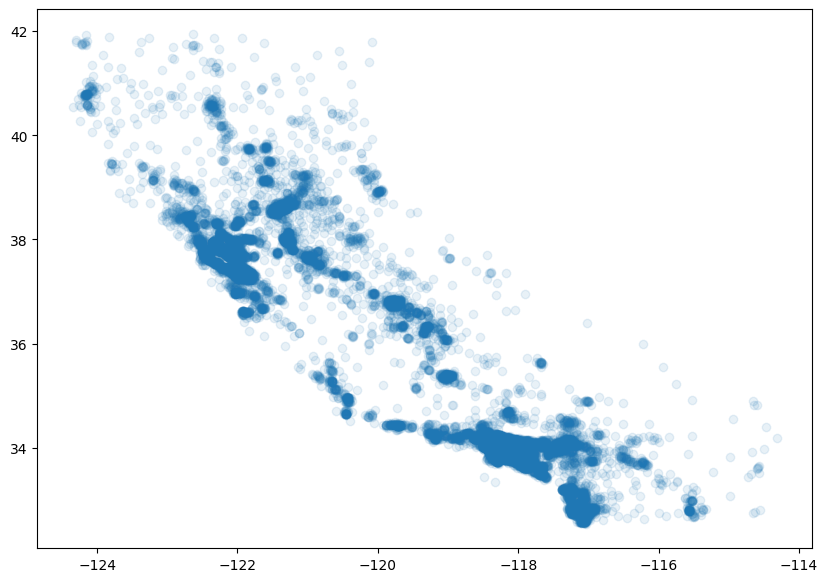

In [17]:
plt.figure(figsize=(10,7))

plt.scatter(
    x=housing['longitude'],
    y=housing['latitude'],
    alpha = 0.1
)

plt.show()

인구수, 집 가격 포함해서 시각화

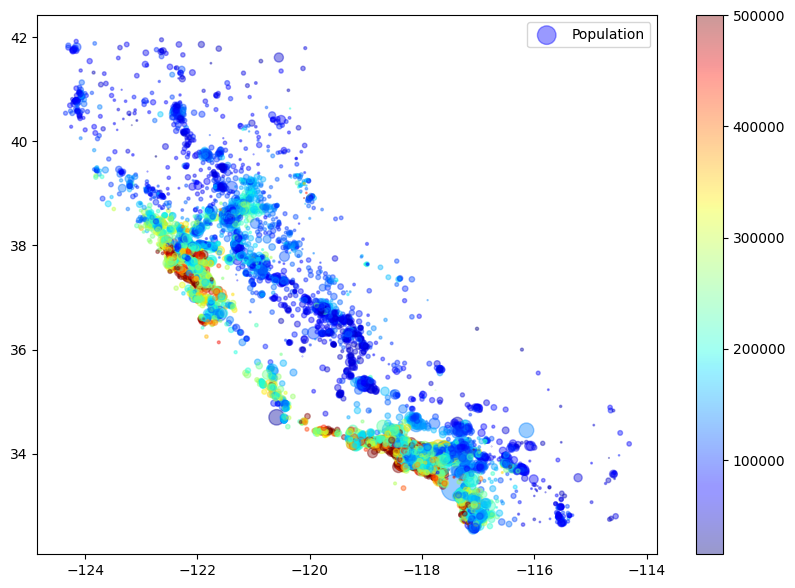

In [18]:
plt.figure(figsize=(10, 7))

plt.scatter(
    x=housing['longitude'],
    y=housing['latitude'],
    alpha=0.4,
    s=housing['population'] / 100, # size | 인구수가 많을 수록 점이 커짐 | 인구수를 그대로 넣으면 너무 크기에 100 나눈 값으로 넣기
    label="Population",
    c=housing['median_house_value'], # color | 집 가격에 따라 색이 변화될 수 있도록 설정
    cmap=plt.get_cmap('jet') # 컬러 테마
)

plt.legend()
plt.colorbar()
plt.show()


# 이를 통해 무조건 해안가 쪽이 비싸진 않지만, 대체적으로 해안가 쪽이 집이 비싸고 내륙쪽이 싸다는 것을 알 수 있음 (캘리포니아 지도)

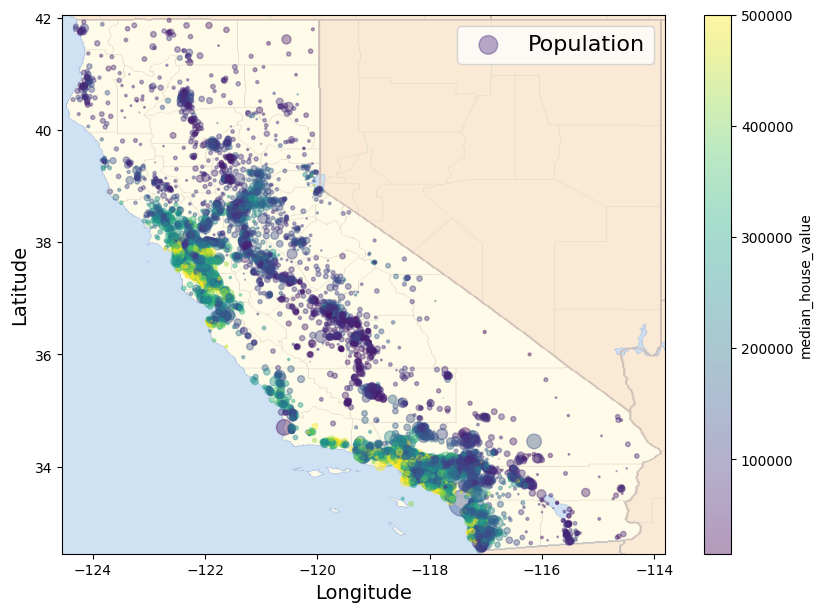

In [19]:
# Download the California image
images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,

                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

- 무작정 해안가라고 해서 집값이 비싸진 않다.
  - 북쪽에는 인구도 많이 없고 집도 싸요
  - 내륙쪽에도 비싼집이 몰려있는 구간이 종종 있다.

# 상관관계 조사하기 ( SCC - Standard Correlation Coefficient )
- 표준 상관계수 조사
- 피어슨 상관계수 ( 피어슨의 $r$)
- 데이터끼리 얼마나 영향을 미치나에 대한 수치
  - $x$가 증가 하면 $y$는 어떻게 증가/감소 하는가?
- -1 ~ 1로 표현

In [20]:
# 집값과 다른 feature 간의 상관관계 구해보기

corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

# 아까 처음에 생각해본대로 median_income은 높은 값을 가짐(feature 중 가장 상관성이 크다)

# income_cat은 계층 분할 할 때 만든 것이라 신경 x (삭제해야 할 데이터)
# 나머지는 크게 상관성이 없어 보임

/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_17484/2716532576.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.drop("ocean_proximity", axis=1).corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

### 데이터와 데이터의 관계


#### 1. 분산 ( variance )
- 데이터에 대한 이산정도를 나타낸다.
  - 이산 정도 : 데이터의 펼쳐짐 정도
- 편차 제곱의 평균

$$
\sigma^{2} = \frac{1}{n}\sum_{i=1}^n{(x_i-\bar{x})^2}\\(\bar{x}:평균)
$$


In [21]:
import numpy as np

data1 = np.array([80, 85, 90, 95, 100])
data2 = np.array([50, 70, 90, 110, 130])

data1.mean(), data2.mean()

(90.0, 90.0)

In [22]:
# 분산
data1.var(), data2.var()

(50.0, 800.0)

표준편차
$$
\sigma = \sqrt{\sigma^{2}}
$$
통계적으로 이야기 할 때는 표준편차를 더 많이 쓴다

In [23]:
data1.std(), data2.std()

(7.0710678118654755, 28.284271247461902)

#### 4. 공분산 ( covariance )
- 두 데이터 집단간의 상관정도를 나타낸다.
- 평균 편차곱
- **방향성**은 보여줄 수 있으나, 강도(세기)를 나타내는데는 한계가 있다.
  - 표본 데이터의 크기에 따라서 값의 차이가 큰 단점이 있다.

$$ \text{cov} = \frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}\\ (\bar{x}:x의 평균, \bar{y}:y의 평균) $$


In [24]:
def covariance(data1, data2):
  x_ = np.mean(data1) # data1의 평균
  y_ = np.mean(data2) # data2의 평균

  return np.sum((data1 - x_) * (data2 - y_)) / len(data1) - 1


In [25]:
data1 = np.array([80, 90, 100, 90, 80])
data2 = np.array([70, 80, 90, 80, 70])

covariance(data1, data2)

# 두 데이터 모두 데이터가 증가하는 추세를 지님: 같은 방향 = 공분산: 양수

55.0

In [26]:
data3 = [80, 85, 90, 85, 80] # 1
data4 = [90, 85, 80, 85, 90] # 2

covariance(data3, data4)

# 1이 증가하면 2는 감소하고 2가 증가하면 1은 감소: 반대 방향 = 공분산: 음수

-15.0

In [27]:
# data3, data4 100배한 것

data5 = [800, 850, 900, 850, 800]
data6 = [900, 850, 800, 850, 900]

covariance(data5, data6)


# 중요한 건 값이 얼마나 크고 작은지가 아닌 공분산이 양수 값인지 음수 값인지 확인하는 것이 중요

-1401.0

#### 상관 계수
- 공분산의 한계를 극복하기 위해서 만들어짐
  - 공분산은 데이터의 방향성만 판단이 가능
- `-1 ~ 1` 까지의 실수를 가지며, 0과 가까울수록 상관도가 적다는 것을 의미

$$
 \text{correlation-coefficient} = \frac{공분산}{\sqrt{{x분산} \cdot {y분산}}}
$$

$$
r = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{{\sum(x-\bar{x})^2}\cdot{\sum(y-\bar{y})^2}}}
$$

In [28]:
# 상관계수 구현하기
def corrcoef(data1, data2):
  x_ = np.mean(data1)
  y_ = np.mean(data2)

  # 분모( x의 분산 * y의 분산)
  x_y_var = np.sum((data1 - x_) ** 2) * np.sum((data2 - y_)**2)
  # 분자( 공분산 )
  x_y_cov = np.sum( (data1-x_)*(data2-y_))

  return x_y_cov / np.sqrt(x_y_var)

In [29]:
# data1과 data2 모두 증가할 때 증가하고, 감소할 때 감소
data1 = np.array([80, 85, 100, 90, 95])
data2 = np.array([70, 75, 85, 80, 83])

corrcoef(data1, data2)

# = 상관성이 매우 높다

0.9837827088491458

In [30]:
data3 = np.array([10, 20, 30, 40, 50])
data4 = np.array([6, 5, 6, 5, 7])

corrcoef(data3, data4)

0.37796447300922725

In [31]:
data5 = np.array([80, 85, 100, 90, 95])
data6 = np.array([100, 90, 70, 90, 80])

corrcoef(data5, data6)

# = 상관성이 매우 높다

-0.970725343394151

In [32]:
data5 = np.array([800, 850, 1000, 900, 950])
data6 = np.array([1000, 900, 700, 900, 800])

corrcoef(data5, data6)

-0.970725343394151

피어슨 상관계수 $r$
- $0 \leq |r| \ \leq 1$
  - $0 \leq |r| \ \leq 0.3$ : 약한 상관 관계
  - $0.3 \leq |r| \ \leq 0.7$ : 보통의 상관 관계
  - $0.7 \leq |r| \ \leq 1$ : 강한 상관 관계

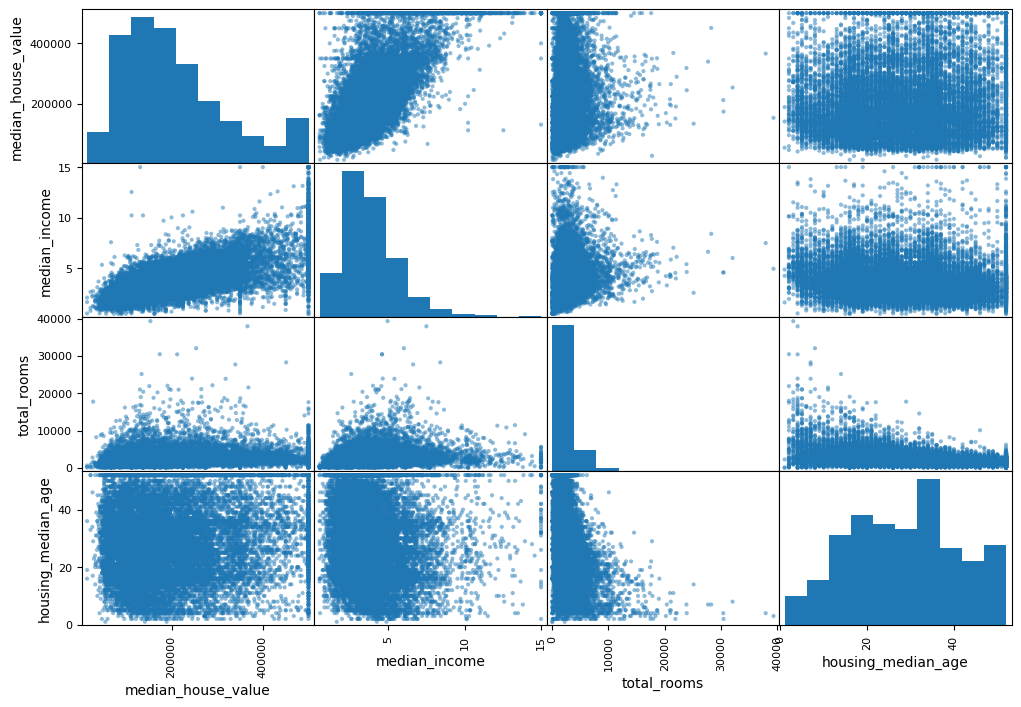

In [33]:
from pandas.plotting import scatter_matrix

feature_names = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[feature_names], figsize = (12,8))

plt.show()

#scatter_matrix 함수를 사용하여 생성된 산점도 행렬(scatter plot matrix)은 여러 변수 간의 상관 관계를 시각적으로 분석하는 데 매우 유용


## 특성 조합
- 두 개 이상의 특성을 조합해서 새로운 특성 생성
    ex.

    비율 구하기

    관계 설정

    다항식 ...etc

비율 구하기를 해볼게요~

In [34]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households'] # 가구당 방의 개수
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms'] # 침실이 차지하는 비율
housing['population_per_household'] = housing['population'] / housing['households'] # 가구당 인구수

In [35]:
# housing에 새로 추가된 특성들 확인

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3,6.096552,0.182692,3.167241


In [36]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_17484/3573122399.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.drop("ocean_proximity", axis=1).corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# 머신러닝을 위한 데이터 준비하기

- 데이터에 대한 각종 전처리를 수행하는 파이프라인 생성

In [37]:
# 필요 없는 feature 제거
housing = housing.drop("income_cat", axis=1)

# Feature, Label 분리
label_name = "median_house_value"

# Label만 꺼내오기
housing_label = housing[label_name].copy()

# feature
housing = housing.drop(label_name, axis=1)

## 1. NaN값 처리
- 데이터 샘플을 제거(행 삭제)
- 아예 컬럼을 제거
  - 한 컬럼에 NaN값이 너무나 많은 경우
- 특정 값으로 채우기
  - 0, 평균, 중간값 등등..
  - 데이터가 충분하다면 NaN값을 예측하기 위한 모델을 만들어서 예측값으로 채우는 경우도 있다.
- 판다스의 `fillna`, `dropna`

In [38]:
# 사이킷런의 Simplelmputer는 누락값을 채우는 클래스
from sklearn.impute import SimpleImputer

# SimpleImputer도 데이터를 바꿔주는 것이기에 트랜스포머에 해당

# 우리의 목표: 파이프 라인 만들기
# 하지만 머신러닝을 할 때 판다스로는 커스터마이징을 한 후 작업을 해야 해서 복잡하거나 불가함

# 하지만 사이킷런 뉴 를 사용하면 쉽게 파이프라인 만들기 가능

imputer = SimpleImputer(strategy="median") # 누락값을 중간값으로 채우기

# 머신러닝 데이터 전처리를 수행할 때: (연속형 데이터 | 범주형 데이터)를 따로 관리해야 함

# 그럼 위의 상황에서는 어떤 데이터지? : median을 썼으니 연속형 데이터
# ok 따로 관리 이제부터 시작

# 연속형 데이터만 모아낼 DF을 새롭게 생성
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16354 non-null  float64
 10  population_per_household  16512 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


In [39]:
X = imputer.fit_transform(housing_num)

In [40]:
housing_tr = pd.DataFrame(
    X, # NaN 값이 채워진 배열
    columns= housing_num.columns,
    index=housing_num.index
)

housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16512 non-null  float64
 10  population_per_household  16512 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


## 2. 범주형 데이터 처리(One Hot Encoding)
- `ocean_proximity`는 문자열 데이터이면서, 범주형(Categorical) 데이터
  - OneHotEncoding을 수행

In [41]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()


#왜 괄호 두개 써요?



,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)

housing_cat_onehot

# print(housing_cat_onehot)

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_one_hot_df = pd.DataFrame(
    housing_cat_onehot.toarray(), # 압축되어 있던게 풀어진다?
    columns=cat_encoder.categories_,
    index = housing_cat.index
)

housing_cat_one_hot_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
15174,1.0,0.0,0.0,0.0,0.0
12661,0.0,1.0,0.0,0.0,0.0
19263,1.0,0.0,0.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0


In [44]:
# 사용자 정의 트랜스포머 만들기: 사이킷런에서 제공하지 않는 트랜스포머를 우리가 직접 만들어서 사이킷런 트랜스포머처럼 작동하게 만들어야 함
# 필요한 클래스를 상속받아 진행해볼 것

## 사용자 정의 Transformer 만들기
- 비즈니스 로직을 위한 특성 공학을 데이터에 적용
  - 사이킷 런에서는 제공하지 않는 데이터 변환이 있다.
    - 방의 비율, 가구 수 대비 인구수의 비율을 구하거나 등등..
    - 우리가 직접 짜야 할 변환 과정
      - 사이킷런에는 없는 작업
      - 우리가 직접 로직을 만들어서 사이킷런에 포함될 수 있도록 설정
---
- 사이킷런의 `BaseEstimator` 클래스 상속
  - 개발한 클래스가 사이킷런 소속에 포함될 수 있도록 해준다.
- 사이킷런의 `TransformerMixin` 클래스 상속
  - `fit_transform()` 자동 구현


***Duck Typing 문법***
- ***메소드의 구현***에 의해서 ***클래스의 정체성이 결정***되는 현상
- `fit()`, `transform()` 메소드를 클래스 내에 정의함에 따라서 사이킷런이 `Transformer`로 인식 한다.

In [45]:
class A:
  def foo(self):
    print("Here is A.foo()")

class B:
  def foo(self):
    print("Here is B.foo()")

class C:
  def goo(self):
    print("Here is C.goo()")

def who_are_you(who):
  who.foo()

In [46]:
who_are_you(A())
who_are_you(B())

Here is A.foo()
Here is B.foo()


In [47]:
# who_are_you(C())

In [48]:
# 사용할 컬럼의 인덱스 확인 - 컬럼명을 사용 못하기 때문...(지원 안해서)
housing.columns

# 우리가 사용할 인덱스는 3,4,5,6

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [49]:
# 상속 받을 클래스 가져오기
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6




# 인덱스로 데이터 가지고 와서  그 데이터 들로 비율을 구하는 커스터 마이징 트랜스포머

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):

  # population_per_households 특성 조합을 해봤는데, 딱히 효과가 없는 것 같다. -> 개발자의 선택에 따라서 추가할지 말지에 대한 설정값 추가
  def __init__(self, add_population_per_households=True):
    self.add_population_per_households = add_population_per_households


  def fit(self, X):
    return self
    # fit은 데이터를 입력 받고, transform에서 변환하기 위한 데이터를 준비
    # 아무것도 안하는데 X를 받는 이유 : Transformer의 Duck Typing 문법을 적용하기 위해
    # 아무것도 적용할 게 없어도 트랜스포머에 적용되어야 하므로 구현해두긴 해야 함 -> "fit(), transform() 메소드를 클래스 내에 정의함에 따라서 사이킷런이 Transformer로 인식 한다."

  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    bedrooms_per_room = X[:,bedrooms_ix] / X[:, rooms_ix]
    # X에 전체 데이터 들어옴. 여기서 3,4,5,6번 데이터를 가지고 와서 비율을 구하는 특성 공학 수행

    if self.add_population_per_households:
      population_per_household = X[:, population_ix] / X[:, households_ix]
      return np.c_[X, rooms_per_household, bedrooms_per_room, population_per_household] # np.c_= 이어 붙이기(concatenate)

    else:
      return np.c_[X, rooms_per_household, bedrooms_per_room]


In [50]:
housing.drop(['rooms_per_household', 'bedrooms_per_room','population_per_household'], axis=1, inplace=True)
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [51]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

In [52]:
attr_adder = CombinedAttributeAdder()
housing_extra_attribs = attr_adder.fit_transform(housing.values)
housing_extra_attribs[:3]

array([[-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
        'INLAND', 5.485835694050992, 0.20578363026077975,
        3.168555240793201],
       [-117.23, 33.09, 7.0, 5320.0, 855.0, 2015.0, 768.0, 6.3373,
        'NEAR OCEAN', 6.927083333333333, 0.16071428571428573,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, 1618.0, 310.0, 667.0, 300.0, 2.875,
        'INLAND', 5.3933333333333335, 0.1915945611866502,
        2.223333333333333]], dtype=object)

## 특성 스케일링

카테고리 형테의 데이터는 제외하고 스케일링 해야 함

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler는 데이터를 평균 0, 표준편차 1로 변환하여 정규 분포를 따르게 하며, 주로 데이터가 정규 분포를 따를 때 사용
# MinMaxScaler는 데이터를 특정 범위(보통 0과 1)로 변환하여 데이터의 최소값과 최대값을 설정된 범위로 맞추며, 데이터의 범위를 일정하게 유지하는 데 사용합

X_std_scaled = StandardScaler().fit_transform(housing_num)


머신러닝을 위한 데이터를 준비할 때 항상 아래와 같은 과정을 일일히 거친다면 매우 귀찮아질 것임.

- 머신러닝을 위한 데이터 준비하기
    1. NaN값 처리
    2. 범주형 데이터 처리(One Hot Encoding)
    3. 사용자 정의 Transformer 만들기
    4. 특성 스케일링

이러한 데이터의 변환 과정을 좀 더 쉽게 진행할 수 있도록 해주는 것이 **파이프라인**

# 파이프라인 생성

데이터의 변환 과정은 매우 많으며, 항상 ***정확한 순서대로 수행이 되어야 한다.***
1. 누락값 채우기(SimpleImputer)
2. 추가 특성 생성(CombinedAttributeAdder)
3. 스케일 조정(StandardScaler)

In [54]:
from sklearn.pipeline import Pipeline

# 파이프라인의 구성 요소는 튜플로 구성

num_pipeline = Pipeline([
    # "앞의 단어("???")는 이름임"
      # Nan 값 제거
    ("imputer", SimpleImputer(strategy='median')),
      # 사용자 정의 Transformer
        # BaseEstimator를 상속받은 클래스이기 때문에 파이프라인의 구성원으로서 참여 가능
          # Scikit-learn의 변환기(transformer)는 fit과 transform 메서드를, 예측기(predictor)는 fit과 predict 메서드를 구현해야 함
          # 이러한 메서드를 구현함으로써, 해당 클래스는 파이프라인의 다른 구성원들과 상호작용할 수 있음
        # Scikit-learn에서는 BaseEstimator와 TransformerMixin을 상속받은 클래스를 파이프라인의 구성원으로 사용할 수 있음
    ("add_attr", CombinedAttributeAdder()),
    # 특성 스케일링
    ("std_scaler", StandardScaler())
])

# 파이프라인은 다음과 같은 단계를 수행합니다:

# 결측값 처리: SimpleImputer를 사용하여 결측값을 중간값으로 채웁니다.
# 특성 추가: CombinedAttributeAdder를 사용하여 새로운 특성을 추가합니다.
# 스케일링: StandardScaler를 사용하여 데이터를 표준화합니다 (평균을 0, 표준편차를 1로 맞춤).

In [55]:
# 아까 붙인 데이터는 지우고 다시 시작

housing_num.drop(['rooms_per_household', 'bedrooms_per_room','population_per_household'], axis=1, inplace=True)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [56]:
# num_pipeline를 사용하면
# 모든 과정(순서대로 사용한 클래스들에(SimpleImputer(strategy='median'),CombinedAttributeAdder(),StandardScaler())대해
# fit과 transform이 진행된다 -> fit, transform이 클래스에 꼭 들어가 있어야 하는 이유

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[:3]

  # num_pipeline.fit_transform(housing_num)
# num_pipeline: 이는 이전에 정의된 파이프라인 객체로, 숫자형 데이터에 대한 여러 전처리 단계를 포함하고 있습니다.
# 파이프라인은 여러 변환기를 순서대로 적용할 수 있게 해줍니다. 각 변환기는 fit 메소드를 통해 학습되고, transform 메소드를 통해 데이터를 변환합니다.

  # fit_transform: fit과 transform을 한 번에 수행합니다.
# fit: 데이터를 사용하여 변환기를 학습시킵니다. 예를 들어, 결측값을 채우기 위한 중간값을 계산하거나, 표준화를 위한 평균과 표준편차를 계산합니다.
# transform: 학습된 변환기를 사용하여 데이터를 변환합니다. 예를 들어, 결측값을 실제로 채우거나 데이터를 표준화합니다.

  # housing_num:
#전처리할 숫자형 데이터 프레임입니다. 이는 범주형 데이터가 제외된 데이터 프레임입니다.



array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526, -0.12112176,
         0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.81086696,
        -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.33827252,
        -0.07537122]])

In [57]:
# 파이프라인을 합친다기 보다, 열 별로 각각 다른 변환을 수행하는 개념 -> ColumnTransformer
# 데이터의 각 열에 대해 서로 다른 전처리 변환을 적용할 수 있도록 해줌.
# 이를 통해 데이터의 형태에 따라 적절한 전처리 방법을 적용할 수 있음
from sklearn.compose import ColumnTransformer

# 판다스 데이터프레임을 사용하고 있기 때문에 데이터의 형태별(연속형/범주형) 칼럼의 이름
num_feature_names = list(housing_num.columns)
cat_feature_names = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_feature_names), # 숫자형 변환기
    ("cat", OneHotEncoder(), cat_feature_names) # 범주형 변환기
])

# full_pipeline 객체는 데이터 전처리 작업을 자동화함
# 이를 통해 데이터셋을 모델에 전달하기 전에 필요한 모든 전처리 작업을 일관되게 수행
    # 1. 숫자형 데이터에 대해 결측값 처리, 스케일링 등 필요한 전처리 작업을 수행
    # 2. 범주형 데이터에 대해 원-핫 인코딩을 수행
    # 3. 전처리된 데이터셋을 결합하여 하나의 일관된 데이터셋으로 만들기 수행

In [58]:
housing_final = full_pipeline.fit_transform(housing)
housing_final[:5]

  # housing_final = full_pipeline.fit_transform(housing):
# full_pipeline을 사용하여 housing 데이터셋에 대해 전처리 작업을 수행하는 과정입니다.
# fit_transform 메소드는 데이터에 맞춰 파이프라인을 학습시키고, 변환된 데이터를 반환합니다.
# housing_final[:5]은 전처리된 데이터셋의 처음 5개의 샘플을 출력합니다.

  # 코드의 의미 및 해석
      # fit_transform(housing):
# fit 메소드: housing 데이터셋을 사용하여 파이프라인 내의 각 변환기를 학습시킵니다. 예를 들어, 숫자형 데이터에 대해 결측값을 채우고 스케일링할 방법을 학습하고, 범주형 데이터에 대해 원-핫 인코딩을 적용하는 방법을 학습합니다.
# transform 메소드: 학습된 변환기를 사용하여 housing 데이터셋을 변환합니다. 모든 전처리 작업이 일관되게 수행된 최종 데이터를 반환합니다.
      # housing_final[:5]:
# housing_final은 전처리된 housing 데이터셋입니다.
# housing_final[:5]은 전처리된 데이터셋의 처음 5개 샘플을 출력합니다.

      # 전처리 결과의 해석
# 결과 배열의 각 행은 전처리된 샘플을 나타내며, 각 열은 전처리된 특성을 나타냅니다.
              # 각 특성의 해석
                  # 숫자형 특성:
      # 전처리된 숫자형 특성들은 num_pipeline을 통해 결측값이 채워지고, 스케일링(예: 표준화)된 값들입니다.
      # 예를 들어, 첫 번째 샘플의 전처리된 숫자형 특성들은 [-0.94135046, 1.34743822, 0.02756357, ...]와 같이 나타납니다.
                  # 범주형 특성:
      # 원-핫 인코딩된 범주형 특성들은 OneHotEncoder를 통해 변환된 값들입니다.
      # ocean_proximity 특성에 대해 5개의 가능한 범주가 있다고 가정하면, 각 범주는 0 또는 1의 값을 가지는 원-핫 인코딩된 배열로 변환됩니다.
      # 예를 들어, 첫 번째 샘플의 범주형 특성은 [0.0, 1.0, 0.0, 0.0, 0.0]와 같이 나타날 수 있습니다.
              # 구체적인 결과 해석
      # 첫 번째 샘플은 전처리된 16개의 특성으로 구성됩니다.
      # 첫 11개의 값은 전처리된 숫자형 특성입니다.
      # 마지막 5개의 값은 원-핫 인코딩된 ocean_proximity 범주형 특성입니다.
  # 결론
# full_pipeline.fit_transform(housing)를 통해 housing 데이터셋에 대해 일관된 전처리 작업이 수행되었습니다.
# 이 결과로 얻은 housing_final은 머신러닝 모델에 바로 사용할 수 있는 전처리된 데이터셋입니다.
# 이는 데이터의 특성별로 적절한 전처리 방법을 적용하여 모델 학습의 성능을 향상시키는 데 도움을 줍니다.



array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526, -0.12112176,
         0.00622264,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.81086696,
        -0.04081077,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.33827252,
        -0.07537122,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997,  0.96120521,
        -0.10680295,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

# 머신러닝 알고리즘 모델 선택 및 훈련

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

    # RandomForest 모델을 위한 하이퍼 파라미터
# param_grid:
# 이 목록에는 두 가지 설정이 포함됩니다.
# 첫 번째 설정은 n_estimators(트리의 수)와 max_features(각 트리에서 고려할 최대 특성 수)를 조합하여 12개의 모델을 만듭니다.
# 두 번째 설정은 부트스트랩 샘플링을 사용하지 않는 경우의 n_estimators와 max_features의 조합으로 6개의 모델을 만듭니다.
# 합계로 총 18개의 모델이 만들어집니다.
param_grid = [
    {"n_estimators" : [3, 10, 30], "max_features": [2, 4, 6, 8]}, # 3x4=12
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]} #1x2x3=6
]
# 총 18개의 모델이 만들어짐

  # GridSearchCV: 여러 하이퍼파라미터 조합을 시도하여 최적의 모델을 찾는 방법입니다.
grid_search = GridSearchCV(
    RandomForestRegressor(), # RandomForestRegressor(): 회귀 분석을 위한 랜덤 포레스트 모델. 우리가 해볼 회귀에 대한 지표는 음수 지표를 사용할 것: 낮으면 낮을 수록 좋은 지표 = 부호를 거꾸로 바꿔주면 된다!
    param_grid, # param_grid: 테스트할 하이퍼파라미터 조합 목록.
    cv=5, # cv=5: 5-폴드 교차 검증을 사용하여 모델을 평가합니다.
    scoring = 'neg_mean_squared_error', # negative mean squared error: 낮으면 낮을 수록 좋은 지표 = 부호를 거꾸로 바꿔주면 된다! -> : 평균 제곱 오차(MSE)를 음수로 변환한 값을 사용하여 모델 성능을 평가합니다. MSE가 낮을수록 모델이 더 정확하므로, 음수 MSE는 절대값이 작을수록 좋은 모델을 의미합니다.
    return_train_score=True, # 훈련 세트 점수도 반환하도록 설정합니다.
    n_jobs=-1 # 모든 CPU 코어를 사용하여 병렬 실행
)

# 분류 문제의 대표적인 지표: 정확도, 정밀도, 재현율, F1
# 회귀 문제의 대표적인 지표: 평균 절대 오차 (MAE), 평균 제곱 오차 (MSE), 평균 제곱근 오차 (RMSE), R**2

# 음수 지표 사용의 이유

# GridSearchCV에서 사용하는 scoring 파라미터는 모델의 성능을 평가할 지표를 지정합니다.
# 기본적으로, Scikit-learn은 평가 지표가 높으면 높을수록 좋은 지표로 간주합니다.
# 즉, scoring에 지정된 함수의 결과가 클수록 좋은 모델로 판단합니다.
# 하지만 회귀 문제의 경우, MAE, MSE, RMSE 등은 낮으면 낮을수록 좋은 지표입니다.
# 이를 해결하기 위해 Scikit-learn에서는 회귀 지표를 음수 값으로 반환하여, 지표 값이 클수록(즉, 음수 절대값이 작을수록) 좋은 모델로 평가합니다.
# 예를 들어, MSE를 음수로 변환하면, 그 값이 작을수록 (음수의 절대값이 작을수록) 더 좋은 모델로 평가됩니다.

grid_search.fit(housing_final, housing_label)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

# 최종 테스트

In [60]:
final_model = grid_search.best_estimator_
final_model

# grid_search.best_estimator_
# 정의: best_estimator_ 속성은 GridSearchCV가 교차 검증을 통해 찾은 최적의 하이퍼파라미터 조합을 사용하여 훈련된 최종 모델을 반환합니다.
# 작동 방식: GridSearchCV는 주어진 모든 하이퍼파라미터 조합에 대해 교차 검증을 수행한 후, 가장 좋은 성능을 보인 모델을 best_estimator_로 설정합니다.
# 2. final_model
# 정의: final_model 변수는 최적의 하이퍼파라미터 조합으로 훈련된 최종 모델을 저장합니다.
# 의미: 이 모델은 GridSearchCV를 통해 최적화된 모델이므로, 주어진 데이터셋에 대해 가장 좋은 성능을 나타낼 것으로 기대됩니다.


RandomForestRegressor(max_features=6, n_estimators=30)

In [61]:
test_set = test_set.drop("income_cat", axis=1)

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set['median_house_value'].copy()

⭐테스트 데이터를 위한 파이프라인(Transformer)은 따로 생성하면 안된다!!!
- 훈련 세트를 위해 만들었던 파이프라인을 그대로 사용해야 한다.
- MinMax, Standard 스케일링 등을 적용했던 값의 분포 유지가 안될 수 있다.

In [62]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared[:3]

array([[ 0.59229422, -0.71065803,  0.02756357,  1.78850799,  1.16374818,
         0.68509554,  1.23238474,  2.31286606,  0.48828718, -0.86813563,
        -0.07091122,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.42180959, -0.35049119, -0.37006852, -0.2817776 , -0.55244122,
        -0.50616043, -0.56965792,  0.59532358,  0.64994343, -0.9445342 ,
        -0.0064973 ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , -0.54693503, -0.64251073,
        -0.54828912, -0.59095237,  0.26669272, -0.06002779, -0.42660962,
        -0.01366375,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [63]:
from sklearn.metrics import mean_squared_error

y_pred = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

47418.45417860185

In [64]:
y_test.describe()

count      4128.000000
mean     206257.795058
std      114176.653346
min       14999.000000
25%      118900.000000
50%      181300.000000
75%      268850.000000
max      500001.000000
Name: median_house_value, dtype: float64